# LAB2

In [1]:
import numpy as np 
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img1 = cv2.imread("images/fish.jpg")
img2 = cv2.imread("images/owl.jpg")
img3 = cv2.imread("images/text1.jpg")
img4 = cv2.imread("images/text2.jpg")
    
gray_img1 = img1[:, :, 0]
gray_img2 = img2[:, :, 0]
gray_img3 = img3[:, :, 0]
gray_img4 = img4[:, :, 0]

## Method Otsu

In [3]:
def otsu(hsg):
    p = hsg/np.sum(hsg)
    q1, q2 = np.zeros(256), np.zeros(256)
    m1, m2 = np.zeros(256), np.zeros(256)
    s1, s2 = np.zeros(256), np.zeros(256)
    
    for t in range(0,255):
        t_n = t+1 if t < 255 else 255
        
        for i in range(0, t+1):
            q1[t] += p[i]
        for i in range(t_n, 255):
            q2[t] += p[i]
            
        for i in range(0, t+1):
            m1[t] += ( i*p[i])/(q1[t]+1e-10)
        for i in range(t_n, 255):
            m2[t] += ( i*p[i])/(q2[t]+1e-10)
        
        for i in range(0, t+1):
            s1[t] += np.square(i-m1[t]) * p[i] / (q1[t]+1e-10)
        for i in range(t_n, 255):
            s2[t] += np.square(i-m2[t]) * p[i] / (q2[t]+1e-10)
            
    s_acc = np.zeros(256)        
    s_acc = q1*q2*np.square(m1-m2)
    
    return np.argmax(s_acc) 

In [4]:
def binarize(img, threshold):
    img_bn = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_bn_ref = np.copy(img_bn)
    
    img_bn[img_bn >= threshold] = 255
    img_bn[img_bn < threshold] = 0
    
    res = cv2.cvtColor(img_bn_ref, cv2.COLOR_GRAY2BGR)
    res[:,:,0] = np. maximum(res[:,:,0], img_bn)
    res[:,:,1] = np. minimum(res[:,:,1], 255 - img_bn)
    res[:,:,2] = np. minimum(res[:,:,2], 255 - img_bn) 
    
    return img_bn

In [5]:
def GetImgHsg(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hsg = np.zeros(256, dtype=np.uint16)
    for y in range(0, img.shape[0]):
        for x in range(0, img.shape[1]):
            hsg[img[y,x]] +=1    
    return hsg/np.max(hsg)   

In [6]:
hsg1 = GetImgHsg(img1)
threshold = otsu(hsg1)
img1_bn_otsu = binarize(img1, threshold)

hsg2 = GetImgHsg(img2)
threshold = otsu(hsg2)
img2_bn_otsu = binarize(img2, threshold)

hsg3 = GetImgHsg(img3)
threshold = otsu(hsg3)
img3_bn_otsu = binarize(img3, threshold)

hsg4 = GetImgHsg(img4)
threshold = otsu(hsg4)
img4_bn_otsu = binarize(img4, threshold)

C:\Users\BOS\AppData\Local\Temp\ipykernel_17280\3552912878.py:6: RuntimeWarning: overflow encountered in scalar add
  hsg[img[y,x]] +=1


## Method Niblack

In [7]:
def Niblack(img, M, k):
    
    height, width = img.shape[:2]
    
    new_height = height + 2 * M
    new_width = width + 2 * M
    new_img = np.full((new_height, new_width), 0 , dtype=img.dtype)
    new_img[M:M+height, M:M+width] = img

    thresholds = np.zeros_like(img, dtype=np.float64)
    m = ((2*M + 1)**2)
    
    for y in range( height):
        for x in range( width):
            
         window = new_img[y-M:y+M, x-M:x+M]
         sum = np.sum(window)
         
         mu = sum / m
          
         for j in range(0, window.shape[0]):
            for i in range( 0, window.shape[1]):
               window[i,j] =  (window[i,j] - mu)**2
        
         sum2 = np.sum(window)
       
         s = np.sqrt(sum2/ m) 
         t = mu + k * s
         thresholds[y, x] = t
         

         if img[y, x] > thresholds[y, x]:
                img[y, x] = 255
         else:
                img[y, x] = 0
    return img

## Method Sauvola

In [8]:
def Sauvola(img, M, k):
    
  height, width = img.shape[:2]
    
  new_height = height + 2 * M
  new_width = width + 2 * M
  new_img = np.full((new_height, new_width), 0 , dtype=img.dtype)
  new_img[M:M+height, M:M+width] = img

  thresholds = np.zeros_like(img, dtype=np.float64)
  m = ((2*M + 1)**2)
      
  for y in range( height):
    for x in range( width):
            
      window = new_img[y-M:y+M, x-M:x+M]
      sum = np.sum(window)
         
      mu = sum / m
          
      for j in range(0, window.shape[0]):
        for i in range( 0, window.shape[1]):
          window[i,j] =  (window[i,j] - mu)**2
        
      sum2 = np.sum(window)
       
      s = np.sqrt(sum2/ m) 
      t = mu * ( 1- k* (1-(s/128) ) )
      thresholds[y, x] = t
         
      if img[y, x] > thresholds[y, x]:
        img[y, x] = 255
      else:
        img[y, x] = 0
        
  return img

## Method Сhristian

In [9]:
def Сhristian(img, M, k):
    
 height, width = img.shape[:2]
    
 new_height = height + 2 * M
 new_width = width + 2 * M
 new_img = np.full((new_height, new_width), 0 , dtype=img.dtype)
 new_img[M:M+height, M:M+width] = img

 thresholds = np.zeros_like(img, dtype=np.float64)
 m = ((2*M + 1)**2)
    
 min_brightness = np.min(img)   
    
 for y in range( height):
    for x in range( width):
            
     window = new_img[y:y+2*M, x:x+2*M]
     sum = np.sum(window)
         
     mu = sum / m
          
     for j in range(0, window.shape[0]):
        for i in range( 0, window.shape[1]):
            window[i,j] = (window[i,j] - mu)**2
        
     sum2 = np.sum(window)
       
     s = np.sqrt(sum2/ m) 
     t = (1 - k)*mu + k*min_brightness + (k* (s/128))*(mu - min_brightness)
     thresholds[y, x] = t
         
     if img[y, x] > thresholds[y, x]:
        img[y, x] = 255
     else:
        img[y, x] = 0
        
 return img

In [10]:
img1_bn_niblack = Niblack(gray_img1, 5, 0.2)
img2_bn_niblack = Niblack(gray_img2, 5, 0.2)
img3_bn_niblack = Niblack(gray_img3, 5, 0.2)
img4_bn_niblack = Niblack(gray_img4, 5, 0.2)

In [11]:
img1_bn_sauvola = Sauvola(gray_img1, 5, 0.3)
img2_bn_sauvola = Sauvola(gray_img2, 3, 0.2)
img3_bn_sauvola = Sauvola(gray_img3, 10, 0.3)
img4_bn_sauvola = Sauvola(gray_img4, 5, 0.5)

In [12]:
img1_bn_christian = Сhristian(gray_img1, 10, 0.5)
img2_bn_christian = Сhristian(gray_img2, 5, 0.5)
img3_bn_christian = Сhristian(gray_img3, 6, 0.5)
img4_bn_christian = Сhristian(gray_img4, 8, 0.5)

(np.float64(-0.5), np.float64(613.5), np.float64(805.5), np.float64(-0.5))

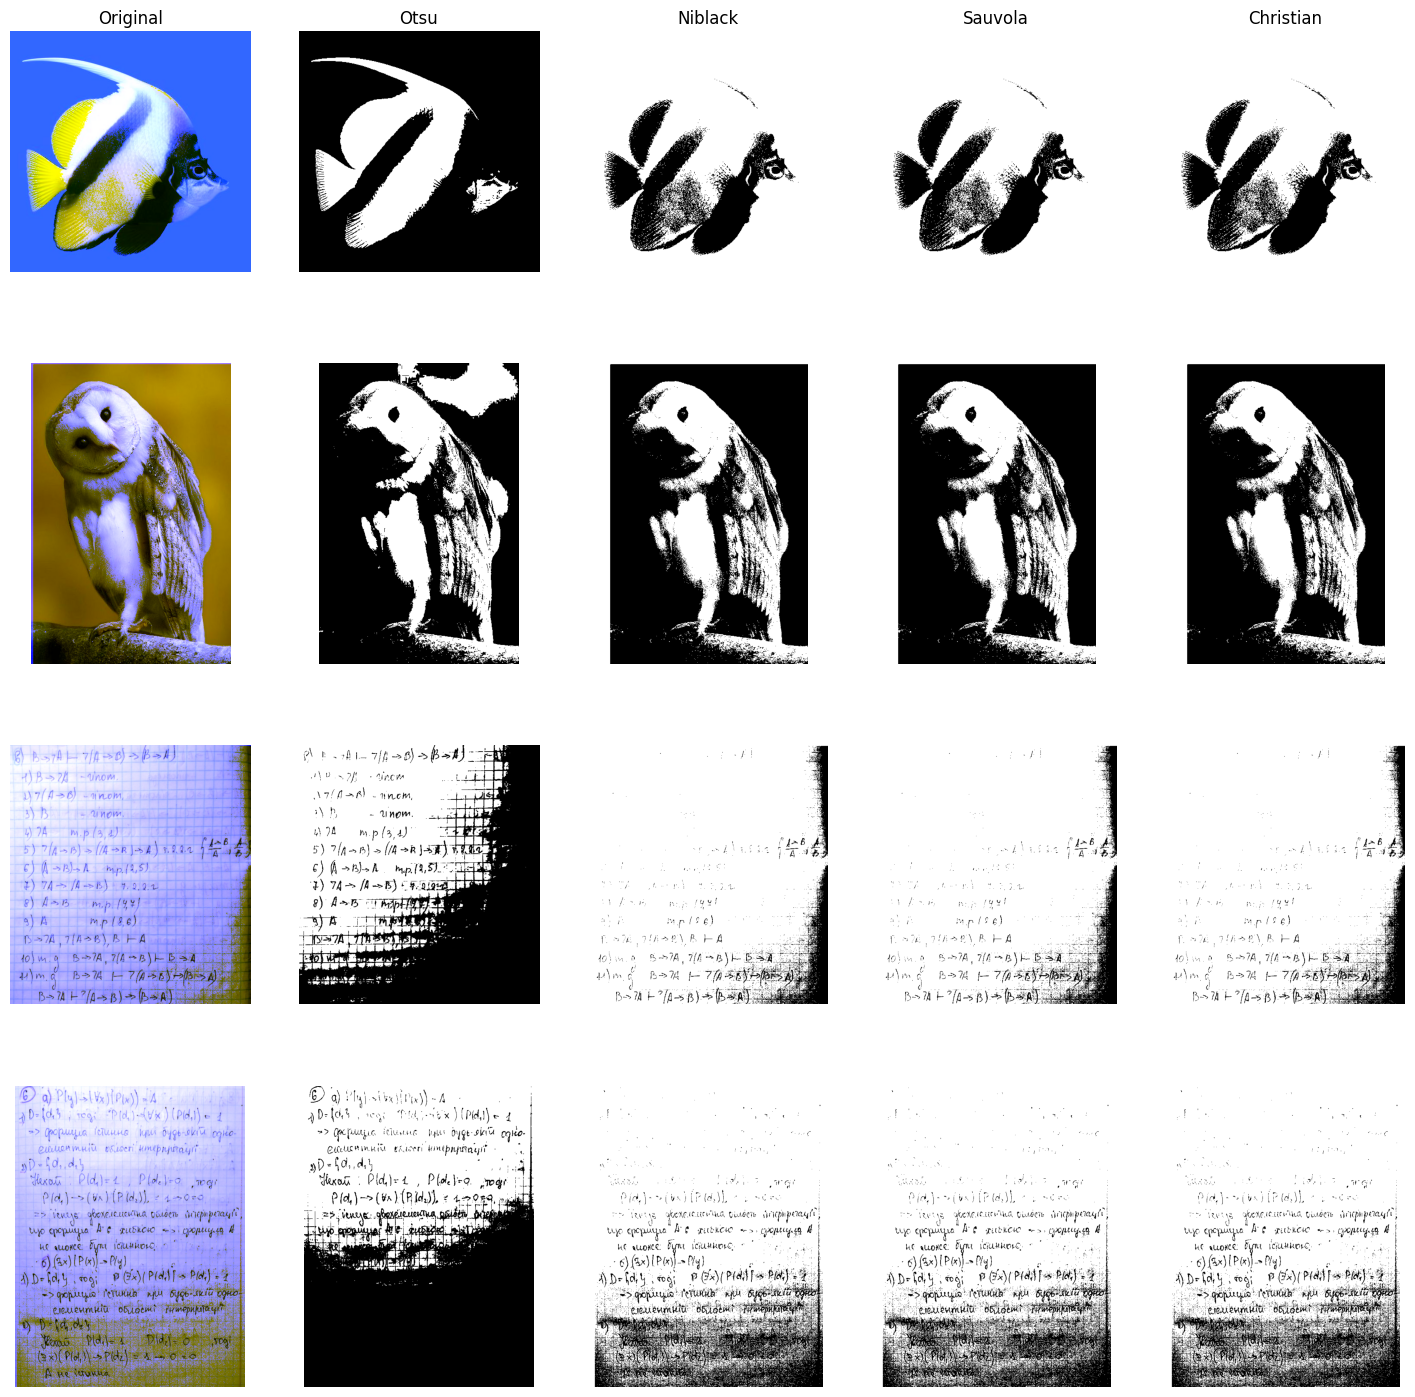

In [13]:
plt.figure(figsize=(18, 18))

#img1
plt.subplot(4, 5, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
 
plt.subplot(4, 5, 2)
plt.title("Otsu")
plt.imshow(img1_bn_otsu, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 3)
plt.title("Niblack")
plt.imshow(img1_bn_niblack, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 4)
plt.title("Sauvola")
plt.imshow(img1_bn_sauvola, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 5)
plt.title("Сhristian")
plt.imshow(img1_bn_christian, cmap="gray")
plt.axis('off')

#img2
plt.subplot(4, 5, 6)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
 
plt.subplot(4, 5, 7)
plt.imshow(img2_bn_otsu, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 8)
plt.imshow(img2_bn_niblack , cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 9)
plt.imshow(img2_bn_sauvola, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 10)
plt.imshow(img2_bn_christian, cmap="gray")
plt.axis('off')

#img3
plt.subplot(4, 5, 11)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.axis('off')
 
plt.subplot(4, 5, 12)
plt.imshow(img3_bn_otsu, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 13)
plt.imshow(img3_bn_niblack, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 14)
plt.imshow(img3_bn_sauvola, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 15)
plt.imshow(img3_bn_christian, cmap="gray")
plt.axis('off')

#img4
plt.subplot(4, 5, 16)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.axis('off')
 
plt.subplot(4, 5, 17)
plt.imshow(img4_bn_otsu, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 18)
plt.imshow(img4_bn_niblack, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 19)
plt.imshow(img4_bn_sauvola, cmap="gray")
plt.axis('off')

plt.subplot(4, 5, 20)
plt.imshow(img4_bn_christian, cmap="gray")
plt.axis('off')